In [3]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import patsy
import sklearn
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [4]:
df7=pd.read_excel('Desktop/Project/Metadata.xlsx',sheet_name='Risks7')
df7

,ASA,morbidity_n7,morbidity_per7,mortality_n7,mortality_per7
0,1,100,3.900,100,0.000
1,1,23071,4.500,0,0.000
2,1,92227,4.600,1,0.001
3,1,43964,7.000,32,0.073
4,1,100,5.200,100,0.600
5,2,104997,10.900,2,0.502
6,2,367161,11.000,9,0.782
7,2,10626,12.600,24,0.226
8,2,100,12.600,100,1.100
9,2,100,11.400,100,1.600


Text(3.5,17,'Mortality')

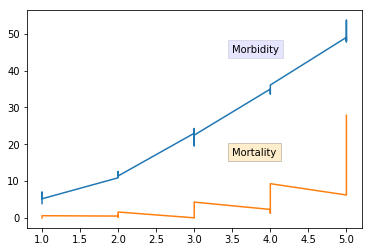

In [5]:
plt.plot(df7['ASA'],df7['morbidity_per7'])
plt.text(3.5,45,'Morbidity',bbox=dict(facecolor='blue', alpha=0.1))
plt.plot(df7['ASA'],df7['mortality_per7'])
plt.text(3.5,17,'Mortality',bbox=dict(facecolor='orange', alpha=0.2))

In [6]:
y, X = patsy.dmatrices('morbidity_per7 ~ morbidity_n7 + ASA', df7, return_type="dataframe")
print (X.columns)
y = np.ravel(y)
model = LinearRegression()
model = model.fit(X, y)
model.score(X, y)
y.mean()

Index(['Intercept', 'morbidity_n7', 'ASA'], dtype='object')


24.696399999999997

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LinearRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
print (predicted)

[13.21706043  2.11780746 36.46759767 36.28130222 24.61568626 47.66944299
 36.46759767 47.66984626]


In [8]:
y, X = patsy.dmatrices('mortality_per7 ~ mortality_n7 + ASA', df7, return_type="dataframe")
print (X.columns)
y = np.ravel(y)
model = LinearRegression()
model = model.fit(X, y)
model.score(X, y)
y.mean()

Index(['Intercept', 'mortality_n7', 'ASA'], dtype='object')


4.58272

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LinearRegression()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)
print (predicted)

[ 0.42031327 -2.40680919  7.56384283  7.16049491  3.63527028  9.02578772
  7.56384283 10.37545192]
